# Stable Baselines, a Fork of OpenAI Baselines - Monitor Training and Plotting

Github Repo: [https://github.com/hill-a/stable-baselines](https://github.com/hill-a/stable-baselines)

Medium article: [https://medium.com/@araffin/stable-baselines-a-fork-of-openai-baselines-df87c4b2fc82](https://medium.com/@araffin/stable-baselines-a-fork-of-openai-baselines-df87c4b2fc82)

[RL Baselines Zoo](https://github.com/araffin/rl-baselines-zoo) is a collection of pre-trained Reinforcement Learning agents using Stable-Baselines.

It also provides basic scripts for training, evaluating agents, tuning hyperparameters and recording videos.

Documentation is available online: [https://stable-baselines.readthedocs.io/](https://stable-baselines.readthedocs.io/)

## Install Dependencies and Stable Baselines Using Pip

List of full dependencies can be found in the [README](https://github.com/hill-a/stable-baselines).

```
sudo apt-get update && sudo apt-get install cmake libopenmpi-dev zlib1g-dev
```


```
pip install stable-baselines[mpi]
```

In [1]:
# Stable Baselines only supports tensorflow 1.x for now
%tensorflow_version 1.x
!apt install swig cmake libopenmpi-dev zlib1g-dev
!pip install stable-baselines[mpi]==2.10.0 box2d box2d-kengz

TensorFlow 1.x selected.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
zlib1g-dev set to manually installed.
libopenmpi-dev is already the newest version (2.1.1-8).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd6

In [2]:
import stable_baselines
stable_baselines.__version__

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



'2.10.0'

## Import policy, RL agent, Wrappers

In [6]:
import os

import gym
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines import DDPG, TD3
from stable_baselines.ddpg.policies import LnMlpPolicy
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines.common.noise import AdaptiveParamNoiseSpec, NormalActionNoise
from stable_baselines.common.callbacks import BaseCallback

## Define a Callback Function


In [7]:
class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq: (int)
    :param log_dir: (str) Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: (int)
    """
    def __init__(self, check_freq: int, log_dir: str, verbose=1):
        super(SaveOnBestTrainingRewardCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, 'best_model')
        self.best_mean_reward = -np.inf

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:

          # Retrieve training reward
          x, y = ts2xy(load_results(self.log_dir), 'timesteps')
          if len(x) > 0:
              # Mean training reward over the last 100 episodes
              mean_reward = np.mean(y[-100:])
              if self.verbose > 0:
                print("Num timesteps: {}".format(self.num_timesteps))
                print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(self.best_mean_reward, mean_reward))

              # New best model, you could save the agent here
              if mean_reward > self.best_mean_reward:
                  self.best_mean_reward = mean_reward
                  # Example for saving best model
                  if self.verbose > 0:
                    print("Saving new best model to {}".format(self.save_path))
                  self.model.save(self.save_path)

        return True

## Create and wrap the environment

We will be using Lunar Lander environment with continuous actions

In [5]:
# Create log dir
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)

# Create and wrap the environment
env = gym.make('LunarLanderContinuous-v2')
param = {"num_levels": 1, "distribution_mode": "easy"}#, "render_mode": "human"}
env = gym.make("procgen:procgen-fruitbot-v0", **param)
# Logs will be saved in log_dir/monitor.csv
env = Monitor(env, log_dir)

Error: ignored

## Define and train the DDPG agent

In [ ]:
# Add some param noise for exploration
param_noise = AdaptiveParamNoiseSpec(initial_stddev=0.1, desired_action_stddev=0.1)
# Create the callback: check every 1000 steps
callback = SaveOnBestTrainingRewardCallback(check_freq=1000, log_dir=log_dir)
# Because we use parameter noise, we should use a MlpPolicy with layer normalization
model = DDPG(LnMlpPolicy, env, param_noise=param_noise, verbose=0)
# Train the agent
model.learn(total_timesteps=int(1e5), callback=callback)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.Dense instead.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




Num timesteps: 1000
Best mean reward: -inf - Last mean reward per episode: -359.89
Saving new best model to /tmp/gym/best_model
Num timesteps: 2000
Best mean reward: -359.89 - Last mean reward per episode: -380.38
Num timesteps: 3000
Best mean reward: -359.89 - Last mean reward per episode: -434.65
Num timesteps: 4000
Best mean reward: -359.89 - Last mean reward per episode: -464.68
Num timesteps: 5000
Best mean reward: -359.89 - Last mean reward per episode: -492.46
Num timesteps: 6000
Best mean reward: -359.89 - Last mean reward per episode: -520.92
Num timesteps: 7000
Best mean reward: -359.89 - Last mean reward per episode: -577.86
Num timesteps: 8000
Best mean reward: -359.89 - Last mean 

## Plotting helpers

Stable Baselines has some built-in plotting helper, that you can find in `stable_baselines.results_plotter`. However, to show how to do it yourself, we are going to use custom plotting functions. 

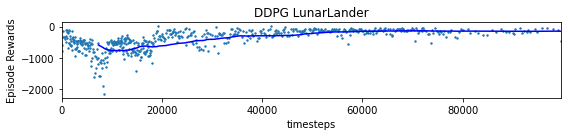

In [ ]:
from stable_baselines import results_plotter

# Helper from the library
results_plotter.plot_results([log_dir], 1e5, results_plotter.X_TIMESTEPS, "DDPG LunarLander")

In [ ]:
def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')


def plot_results(log_folder, title='Learning Curve'):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = ts2xy(load_results(log_folder), 'timesteps')
    y = moving_average(y, window=50)
    # Truncate x
    x = x[len(x) - len(y):]

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel('Number of Timesteps')
    plt.ylabel('Rewards')
    plt.title(title + " Smoothed")
    plt.show()


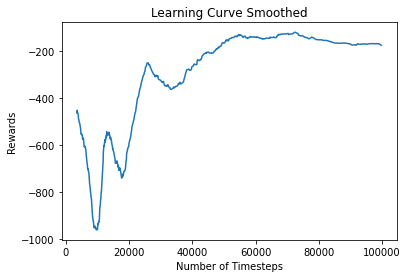

In [ ]:
plot_results(log_dir)

In [8]:
!pip install procgen


     |████████████████████████████████| 39.9MB 114kB/s 
     |████████████████████████████████| 51kB 4.8MB/s 
     |████████████████████████████████| 22.2MB 1.7MB/s 
     |████████████████████████████████| 3.3MB 40.1MB/s 
     |████████████████████████████████| 675kB 30.4MB/s 
     |████████████████████████████████| 204kB 43.5MB/s 
     |████████████████████████████████| 40kB 4.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1


In [9]:
# import time
# import gym
# import math
# import random
# import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt
# from collections import namedtuple
# from itertools import count
# from PIL import Image
# import os 

# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torch.nn.functional as F
# import torchvision.transforms as T


from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2
from stable_baselines import results_plotter
from stable_baselines.bench import Monitor

log_dir = "/tmp/log/"
os.makedirs(log_dir, exist_ok=True)

param = {"num_levels": 1, "distribution_mode": "easy"}#, "render_mode": "human"}
env = gym.make("procgen:procgen-fruitbot-v0", **param)
env = Monitor(env, log_dir)


In [10]:
# Create log dir
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)

# Create and wrap the environment
# env = gym.make('LunarLanderContinuous-v2')
param = {"num_levels": 1, "distribution_mode": "easy"}#, "render_mode": "human"}
env = gym.make("procgen:procgen-fruitbot-v0", **param)
# Logs will be saved in log_dir/monitor.csv
env = Monitor(env, log_dir)

In [11]:

model = PPO2(MlpPolicy, env, verbose=1)
model.learn(total_timesteps=5000)


Wrapping the env in a DummyVecEnv.




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



--------------------------------------
| approxkl           | 0.00057297916 |
| clipfrac           | 0.0           |
| ep_len_mean        | 51            |
| ep_reward_mean     | -4            |
| explained_variance | -0.00131      |
| fps                | 127           |
| n_updates          | 1             |
| policy_entropy     | 2.7074735     |
| policy_loss        | -0.007630544  |
| serial_timesteps   | 128           |
| time_elapsed       | 3.17e-05      |
| total_timesteps    | 128           |
| value_loss         | 1.0735801     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00024630476 |
| clipfrac           | 0.0           |
| ep_len_mean        | 51

In [17]:
obs = env.reset()
for i in range(1000):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()
    # if dones:
    #     env.reset()
    # time.sleep(0.5)
env.close()

NameError: ignored

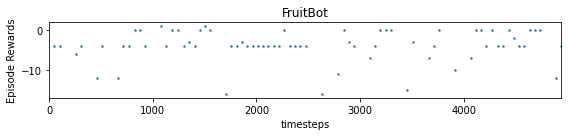

In [12]:
results_plotter.plot_results([log_dir], 10e6, results_plotter.X_TIMESTEPS, "FruitBot")


## TD3 vs DDPG

TD3 is the successor of DDPG (cf [Documentation](https://stable-baselines.readthedocs.io/))

In [ ]:
# Create log dir
log_dir = "/tmp/gym/td3/"
os.makedirs(log_dir, exist_ok=True)

# Create and wrap the environment
env = gym.make('LunarLanderContinuous-v2')
# Logs will be saved in log_dir/monitor.csv
env = Monitor(env, log_dir)

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [ ]:
# Create action noise because TD3 and DDPG use a deterministic policy
n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

In [ ]:
policy_kwargs = dict(layers=[400, 300])
model_td3 = TD3("MlpPolicy", env, action_noise=action_noise, buffer_size=int(1e5), policy_kwargs=policy_kwargs, verbose=0)

In [ ]:
# Create the callback: check every 1000 steps
callback = SaveOnBestTrainingRewardCallback(check_freq=1000, log_dir=log_dir)

In [ ]:
# Train the agent
model_td3.learn(total_timesteps=int(1e5), callback=callback)

In [ ]:
plot_results(log_dir)

In [ ]:
results_plotter.plot_results([log_dir], 1e5, results_plotter.X_TIMESTEPS, "TD3 LunarLander")